# Qredo transaction activity - Data Analysis

#### Maria Silva, May 2023

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data import

In [2]:
file = os.path.realpath("../data/agg_tx.csv")
daily_df = pd.read_csv(file)
daily_df["day"] = pd.to_datetime(daily_df["day"])
daily_df["year_month"] = daily_df["day"].dt.year.astype("str") + "-" + daily_df["day"].dt.month.astype("str")
daily_df.head()

,day,tx_group,tx_type,tx_count,amount_usd,year_month
0,2021-08-26,qrdo,withdraw,2,1.855119e+06,2021-8
1,2021-08-30,qrdo,withdraw,6,4.638558e+07,2021-8
2,2021-09-05,qrdo,withdraw,2,2.385865e+05,2021-9
3,2021-09-06,qrdo,deposit,15,2.805293e+04,2021-9
4,2021-09-06,qrdo,withdraw,1,4.981191e+04,2021-9


In [3]:
daily_df["day"].agg(["min", "max"])

min   2021-08-26
max   2023-05-19
Name: day, dtype: datetime64[ns]

In [4]:
temp_df = daily_df.groupby("tx_type")["tx_count"].sum()/daily_df["tx_count"].sum()
temp_df.sort_values(ascending=False)

tx_type
staking       0.438709
vestingOut    0.192817
vestingIn     0.190896
mmi           0.094333
withdraw      0.037032
ql2           0.033910
deposit       0.012303
Name: tx_count, dtype: float64

In [5]:
group = daily_df.groupby(["year_month", "tx_group", "tx_type"])
monthly_df = group[["tx_count","amount_usd"]].sum()
monthly_df["day"] = group["day"].first()
monthly_df = monthly_df.reset_index()

monthly_df.head()

,year_month,tx_group,tx_type,tx_count,amount_usd,day
0,2021-10,mmi,mmi,6,9.506979e+02,2021-10-28
1,2021-10,qrdo,deposit,377,8.924332e+06,2021-10-01
2,2021-10,qrdo,ql2,2177,8.218761e+06,2021-10-01
3,2021-10,qrdo,staking,17507,2.825096e+05,2021-10-06
4,2021-10,qrdo,vestingIn,1777,8.193487e+06,2021-10-04


## Transaction counts - Daily

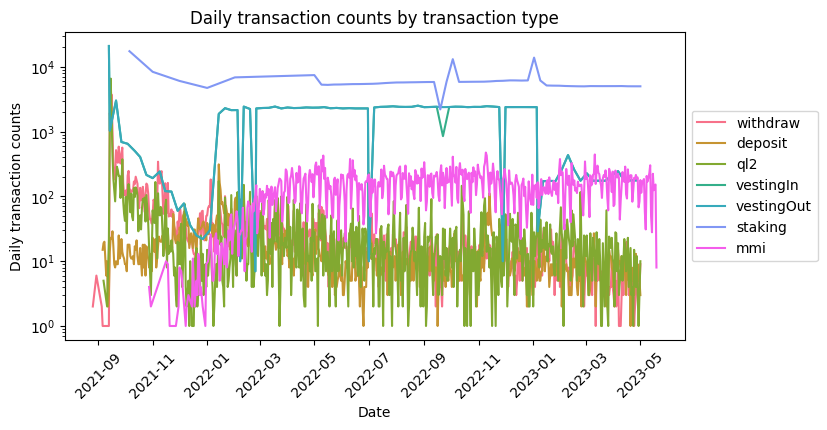

In [6]:
plt.figure(figsize=(8,4))
sns.lineplot(data=daily_df, x="day", y="tx_count",hue="tx_type", palette="husl")
plt.ylabel("Daily transaction counts")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Daily transaction counts by transaction type")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

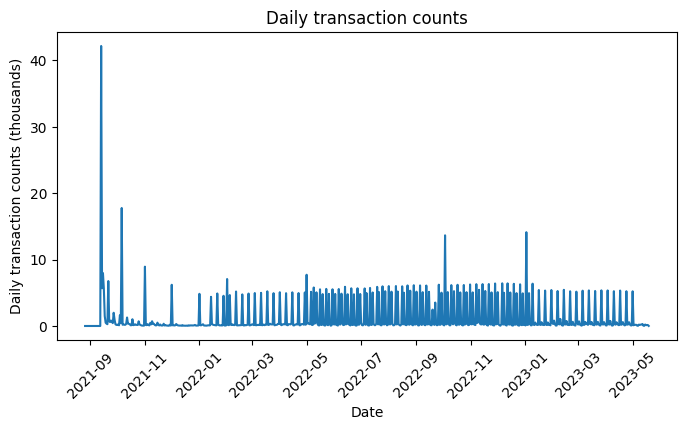

In [7]:
temp_df = daily_df.groupby("day")["tx_count"].sum().reset_index()
temp_df["tx_count"] = temp_df["tx_count"]/1000

plt.figure(figsize=(8,4))
sns.lineplot(data=temp_df, x="day", y="tx_count")
plt.ylabel("Daily transaction counts (thousands)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.title("Daily transaction counts")
plt.show()

In [8]:
daily_df.groupby("tx_type")["tx_count"].agg(["mean", "std"])

,mean,std
tx_type,,
deposit,16.374793,19.827801
mmi,144.211429,88.776926
ql2,46.602740,293.568977
staking,6070.775862,2254.664654
vestingIn,1683.648352,2318.559420
vestingOut,1700.593407,2318.063368
withdraw,49.536667,193.502517


In [9]:
temp_df = daily_df.groupby("tx_type")["tx_count"].quantile([0, 0.25, 0.5, 0.75, 1]).reset_index()
temp_df["quantile"] = temp_df["level_1"]
temp_df.pivot(index='tx_type', columns='quantile', values='tx_count')

quantile,0.00,0.25,0.50,0.75,1.00
tx_type,,,,,
deposit,1.0,7.00,11.0,19.0,313.0
mmi,1.0,74.00,148.0,206.0,477.0
ql2,1.0,7.00,16.0,32.0,6611.0
staking,2209.0,5093.50,5666.0,5969.0,17507.0
vestingIn,7.0,184.50,2289.0,2401.0,21069.0
vestingOut,7.0,184.50,2289.0,2401.0,21069.0
withdraw,1.0,9.75,17.0,33.0,3745.0


## Transaction counts - Monthly

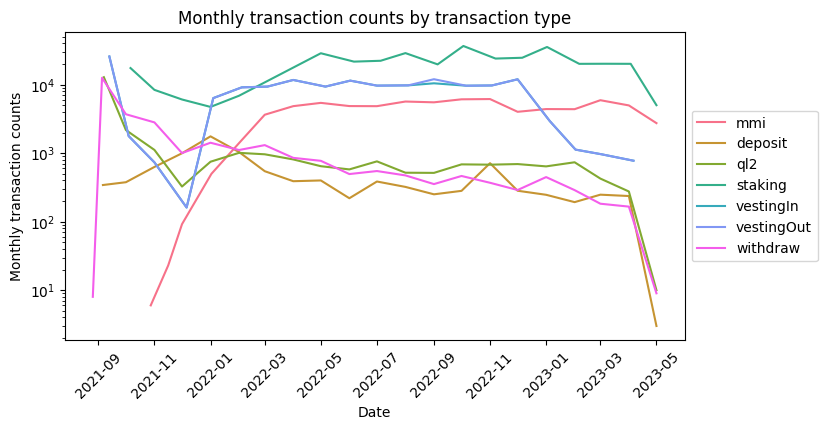

In [10]:
plt.figure(figsize=(8,4))
sns.lineplot(data=monthly_df, x="day", y="tx_count",hue="tx_type", palette="husl")
plt.ylabel("Monthly transaction counts")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Monthly transaction counts by transaction type")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

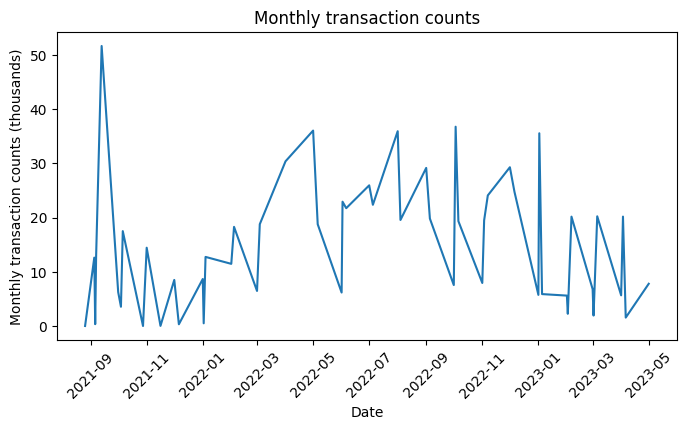

In [11]:
temp_df = monthly_df.groupby("day")["tx_count"].sum().reset_index()
temp_df["tx_count"] = temp_df["tx_count"]/1000

plt.figure(figsize=(8,4))
sns.lineplot(data=temp_df, x="day", y="tx_count")
plt.ylabel("Monthly transaction counts (thousands)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.title("Monthly transaction counts")
plt.show()

In [12]:
monthly_df.groupby("tx_type")["tx_count"].agg(["mean", "std"])

,mean,std
tx_type,,
deposit,470.190476,391.115152
mmi,3785.550000,2183.358024
ql2,1296.000000,2688.082662
staking,19561.388889,9965.087864
vestingIn,7660.600000,6116.777320
vestingOut,7737.700000,6163.815566
withdraw,1351.000000,2669.981166


In [13]:
temp_df = monthly_df.groupby("tx_type")["tx_count"].quantile([0, 0.25, 0.5, 0.75, 1]).reset_index()
temp_df["quantile"] = temp_df["level_1"]
temp_df.pivot(index='tx_type', columns='quantile', values='tx_count')

quantile,0.00,0.25,0.50,0.75,1.00
tx_type,,,,,
deposit,3.0,248.00,343.0,546.00,1762.0
mmi,6.0,2411.75,4635.0,5455.50,6174.0
ql2,10.0,519.00,687.0,811.00,12885.0
staking,4742.0,10685.00,20210.0,24584.25,36768.0
vestingIn,161.0,1614.75,9389.5,9957.50,25830.0
vestingOut,161.0,1614.75,9389.5,10202.75,25830.0
withdraw,8.0,306.00,485.0,1086.00,12617.0


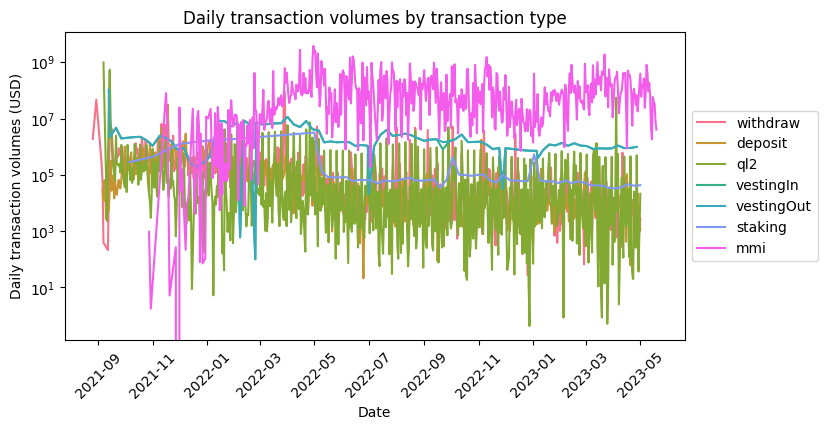

In [14]:
plt.figure(figsize=(8,4))
sns.lineplot(data=daily_df, x="day", y="amount_usd",hue="tx_type", palette="husl")
plt.ylabel("Daily transaction volumes (USD)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Daily transaction volumes by transaction type")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

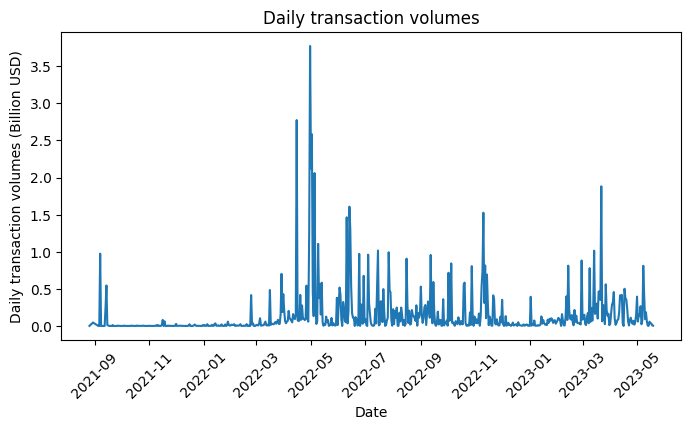

In [15]:
temp_df = daily_df.groupby("day")["amount_usd"].sum().reset_index()
temp_df["amount_usd"] = temp_df["amount_usd"]/1000000000

plt.figure(figsize=(8,4))
sns.lineplot(data=temp_df, x="day", y="amount_usd")
plt.ylabel("Daily transaction volumes (Billion USD)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.title("Daily transaction volumes")
plt.show()

In [16]:
daily_df.groupby("tx_type")["tx_count"].agg(["mean", "std"])

,mean,std
tx_type,,
deposit,16.374793,19.827801
mmi,144.211429,88.776926
ql2,46.602740,293.568977
staking,6070.775862,2254.664654
vestingIn,1683.648352,2318.559420
vestingOut,1700.593407,2318.063368
withdraw,49.536667,193.502517


In [17]:
temp_df = daily_df.groupby("tx_type")["tx_count"].quantile([0, 0.25, 0.5, 0.75, 1]).reset_index()
temp_df["quantile"] = temp_df["level_1"]
temp_df.pivot(index='tx_type', columns='quantile', values='tx_count')

quantile,0.00,0.25,0.50,0.75,1.00
tx_type,,,,,
deposit,1.0,7.00,11.0,19.0,313.0
mmi,1.0,74.00,148.0,206.0,477.0
ql2,1.0,7.00,16.0,32.0,6611.0
staking,2209.0,5093.50,5666.0,5969.0,17507.0
vestingIn,7.0,184.50,2289.0,2401.0,21069.0
vestingOut,7.0,184.50,2289.0,2401.0,21069.0
withdraw,1.0,9.75,17.0,33.0,3745.0
